# DS 5100 Group Project
Uyen Nguyen (gmd8sq)  
Andy Ortiz (eao7r)  
Lee Ann Johnson (lj6gd)  
JD Pinto (jp5ph)

### Functions

In [1]:
# function that checks for files to delete
def cleanup():
  import os
  try:
    os.remove("LLCP2016.XPT") 
    os.remove("LLCP2017.XPT")
    os.remove("LLCP2018.XPT")
    os.remove("LLCP2019.XPT")
    os.remove("LLCP2020.XPT")
    return 'Files were removed.'
  except:
    return 'These files have already been removed.'

In [2]:
# function that converts XPT/SAS formatted files to pandas dataframes
def converter():
  try:
    brfss2016 = pd.read_sas("LLCP2016.XPT", format='xport')

    brfss2017 = pd.read_sas("LLCP2017.XPT", format='xport')

    brfss2018 = pd.read_sas("LLCP2018.XPT", format='xport')

    brfss2019 = pd.read_sas("LLCP2019.XPT", format='xport')

    brfss2020 = pd.read_sas("LLCP2020.XPT", format='xport')
    return 'All files were converted.'
  except:
    return 'File conversion was interrupted.'

### Data Acquisition

The original CDC BRFSS data download links are  
https://www.cdc.gov/brfss/annual_data/2016/files/LLCP2016XPT.zip  
https://www.cdc.gov/brfss/annual_data/2017/files/LLCP2017XPT.zip  
https://www.cdc.gov/brfss/annual_data/2018/files/LLCP2018XPT.zip  
https://www.cdc.gov/brfss/annual_data/2019/files/LLCP2019XPT.zip  
https://www.cdc.gov/brfss/annual_data/2020/files/LLCP2020XPT.zip

These links yield zipped files, which we decompressed into the original SAS format.  
These uncompressed SAS files are saved in our Google Drive.  
The following code will download these uncompressed SAS format files into this notebook.  
Takes about 3 minutes.

In [66]:
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1eZEJcs475GkYiZuA140-yApWJPPjMIvu' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1eZEJcs475GkYiZuA140-yApWJPPjMIvu" -O LLCP2016.XPT &&rm -rf /tmp/cookies.txt

!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1et4-t9Nfz9kuv6eJ5lSmu5BeYh4LC1Ac' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1et4-t9Nfz9kuv6eJ5lSmu5BeYh4LC1Ac" -O LLCP2017.XPT &&rm -rf /tmp/cookies.txt

!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1d7gaJ97Wikkpg0oKzu-TkoRCc6yjHWSX' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1d7gaJ97Wikkpg0oKzu-TkoRCc6yjHWSX" -O LLCP2018.XPT &&rm -rf /tmp/cookies.txt

!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=16uXxriJalDLsVxpddV_CZ9EE7nPtvJV_' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=16uXxriJalDLsVxpddV_CZ9EE7nPtvJV_" -O LLCP2019.XPT &&rm -rf /tmp/cookies.txt

!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TDezb0zAXg9o7bdg9-PUwPIccck-B5hh' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1TDezb0zAXg9o7bdg9-PUwPIccck-B5hh" -O LLCP2020.XPT &&rm -rf /tmp/cookies.txt

LLCP2016.XPT        100%[===================>]   1018M   211MB/s    in 5.0s    
LLCP2017.XPT        100%[===================>]   1.20G  51.5MB/s    in 12s     
LLCP2018.XPT        100%[===================>] 917.40M  58.6MB/s    in 14s     
LLCP2019.XPT        100%[===================>]   1.06G  50.7MB/s    in 19s     
LLCP2020.XPT        100%[===================>] 848.75M  56.9MB/s    in 13s     


In [67]:
import sys
from pathlib import Path
try:
  if (Path('LLCP2016.XPT').stat().st_size < 1000000000 or \
      Path('LLCP2017.XPT').stat().st_size < 1100000000 or \
      Path('LLCP2018.XPT').stat().st_size < 900000000 or \
      Path('LLCP2019.XPT').stat().st_size < 1000000000 or \
      Path('LLCP2020.XPT').stat().st_size < 800000000):
    sys.exit('Download failed. Restart the program.')
except:
  sys.exit('Download failed. Restart the program.')

### Data Preparation

The following code converts the SAS formatted files into pandas dataframes.  
Takes about 5 minutes.

In [ ]:
import pandas as pd
try:
  brfss2016 = pd.read_sas("LLCP2016.XPT", format='xport')

  brfss2017 = pd.read_sas("LLCP2017.XPT", format='xport')

  brfss2018 = pd.read_sas("LLCP2018.XPT", format='xport')

  brfss2019 = pd.read_sas("LLCP2019.XPT", format='xport')

  brfss2020 = pd.read_sas("LLCP2020.XPT", format='xport')
  print('All files were converted.')
except:
  sys.exit('File conversion was interrupted.')

(Optional) The following code deletes the no-longer-needed SAS files in order to free memory.

In [6]:
print(cleanup())

Files were removed.


In order to test our hypothesis, 18 variables were chosen from the 279 columns.

Each year's data was reviewed for consistency of the variable fields.  
There were some differences between the years, requiring renaming of some variable fields before merging all of the data into one dataframe. 

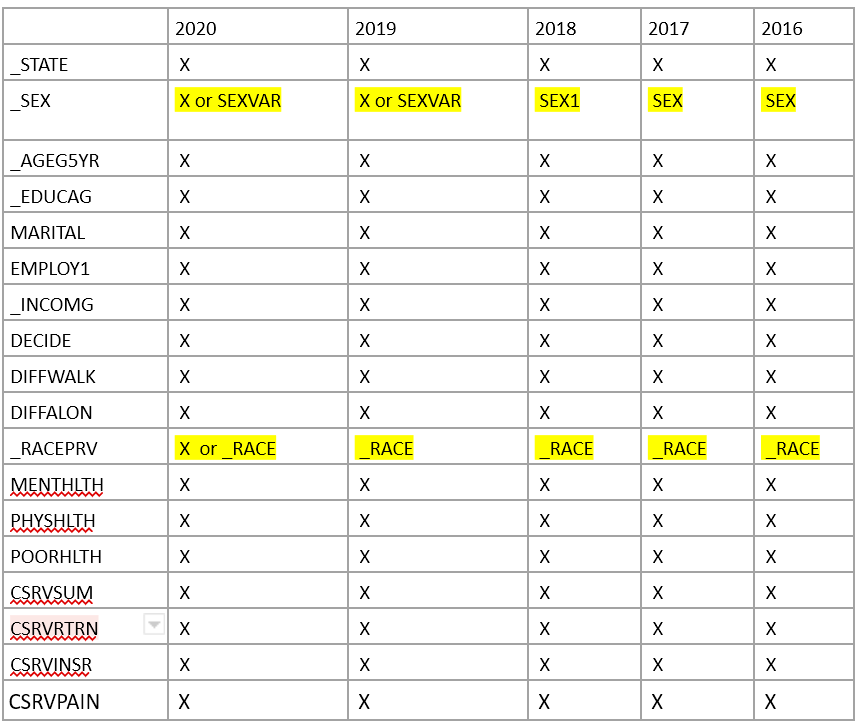

'_SEX' is not present before 2019; will convert 'SEXVAR' to 'SEX' for 2020, 2019  
'SEX1' to 'SEX' for 2018; 'SEX' stays unchanged for 2017, 2016  
'_RACEPRV' not present before 2020; will use '_RACE' for all years instead


The final list of 18 variables:  
_STATE  
SEX  
_AGEG5YR  
_EDUCAG  
MARITAL  
EMPLOY1  
_INCOMG  
DECIDE  
DIFFWALK  
DIFFALON  
_RACE 
MENTHLTH  
PHYSHLTH  
POORHLTH  
CSRVSUM  
CSRVRTRN  
CSRVINSR  
CSRVPAIN

Only the lung cancer survivors are selected, and since some of each year's data fields required renaming, each year is modified separately and then saved into an 18 column csv file.

In [7]:
cancer_vars2016 = ['_STATE', 'SEX', '_AGEG5YR', '_EDUCAG', 'MARITAL', 'EMPLOY1', '_INCOMG',
               'DECIDE', 'DIFFWALK', 'DIFFALON', '_RACE', 'MENTHLTH',
               'PHYSHLTH', 'POORHLTH','CSRVSUM', 'CSRVRTRN', 'CSRVINSR',
               'CSRVPAIN']
brfss2016 = brfss2016[(brfss2016["CNCRDIFF"] <= 3) & (brfss2016["CNCRTYP1"] == 24)]
lungCancer2016 = brfss2016[cancer_vars2016]

In [8]:
cancer_vars2017 = ['_STATE', 'SEX', '_AGEG5YR', '_EDUCAG', 'MARITAL', 'EMPLOY1', '_INCOMG',
               'DECIDE', 'DIFFWALK', 'DIFFALON', '_RACE', 'MENTHLTH',
               'PHYSHLTH', 'POORHLTH','CSRVSUM', 'CSRVRTRN', 'CSRVINSR',
               'CSRVPAIN']
brfss2017 = brfss2017[(brfss2017["CNCRDIFF"] <= 3) & (brfss2017["CNCRTYP1"] == 24)]
lungCancer2017 = brfss2017[cancer_vars2017]

In [9]:
cancer_vars2018 = ['_STATE', 'SEX1', '_AGEG5YR', '_EDUCAG', 'MARITAL', 'EMPLOY1', '_INCOMG',
               'DECIDE', 'DIFFWALK', 'DIFFALON', '_RACE', 'MENTHLTH',
               'PHYSHLTH', 'POORHLTH','CSRVSUM', 'CSRVRTRN', 'CSRVINSR',
               'CSRVPAIN']
brfss2018 = brfss2018[(brfss2018["CNCRDIFF"] <= 3) & (brfss2018["CNCRTYP1"] == 24)]
lungCancer2018 = brfss2018[cancer_vars2018]
lungCancer2018.rename(columns={'SEX1': 'SEX'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
cancer_vars2019 = ['_STATE', 'SEXVAR', '_AGEG5YR', '_EDUCAG', 'MARITAL', 'EMPLOY1', '_INCOMG',
               'DECIDE', 'DIFFWALK', 'DIFFALON', '_RACE', 'MENTHLTH',
               'PHYSHLTH', 'POORHLTH','CSRVSUM', 'CSRVRTRN', 'CSRVINSR',
               'CSRVPAIN']
brfss2019 = brfss2019[(brfss2019["CNCRDIFF"] <= 3) & (brfss2019["CNCRTYP1"] == 24)]
lungCancer2019 = brfss2019[cancer_vars2019]
lungCancer2019.rename(columns={'SEXVAR': 'SEX'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
cancer_vars2020 = ['_STATE', 'SEXVAR', '_AGEG5YR', '_EDUCAG', 'MARITAL', 'EMPLOY1', '_INCOMG',
               'DECIDE', 'DIFFWALK', 'DIFFALON', '_RACE', 'MENTHLTH',
               'PHYSHLTH', 'POORHLTH','CSRVSUM', 'CSRVRTRN', 'CSRVINSR',
               'CSRVPAIN']
brfss2020 = brfss2020[(brfss2020["CNCRDIFF"] <= 3) & (brfss2020["CNCRTYP1"] == 24)]
lungCancer2020= brfss2020[cancer_vars2020]
lungCancer2020.rename(columns={'SEXVAR': 'SEX'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


The above 5 dataframes are combined into one dataframe.

In [12]:
FiveYrLungCancer = lungCancer2016.append(lungCancer2017)
del(lungCancer2016)
del(lungCancer2017)
FiveYrLungCancer = FiveYrLungCancer.append(lungCancer2018)
del(lungCancer2018)
FiveYrLungCancer = FiveYrLungCancer.append(lungCancer2019)
del(lungCancer2019)
FiveYrLungCancer = FiveYrLungCancer.append(lungCancer2020)
del(lungCancer2020)

The dataframe of all lung cancer survivors is then saved into a CSV file.

In [13]:
FiveYrLungCancer = FiveYrLungCancer.reset_index()
FiveYrLungCancer.to_csv('FiveYrLungCancer.csv')

This is a view of the final FiveYrLungCancer dataframe.

In [14]:
FiveYrLungCancer.head()

,index,_STATE,SEX,_AGEG5YR,_EDUCAG,MARITAL,EMPLOY1,_INCOMG,DECIDE,DIFFWALK,DIFFALON,_RACE,MENTHLTH,PHYSHLTH,POORHLTH,CSRVSUM,CSRVRTRN,CSRVINSR,CSRVPAIN
0,121980,16.0,2.0,10.0,2.0,2.0,7.0,2.0,2.0,2.0,2.0,1.0,88.0,10.0,5.0,1.0,1.0,1.0,2.0
1,122094,16.0,2.0,10.0,3.0,3.0,7.0,1.0,2.0,1.0,2.0,1.0,4.0,30.0,30.0,1.0,1.0,1.0,1.0
2,122432,16.0,2.0,13.0,1.0,1.0,5.0,2.0,2.0,1.0,2.0,1.0,88.0,30.0,99.0,1.0,1.0,1.0,2.0
3,122614,16.0,2.0,13.0,1.0,3.0,8.0,1.0,1.0,1.0,1.0,1.0,21.0,30.0,15.0,1.0,1.0,1.0,2.0
4,122786,16.0,1.0,11.0,4.0,1.0,7.0,5.0,2.0,1.0,2.0,1.0,30.0,30.0,88.0,1.0,2.0,1.0,2.0


Prior to running any modeling procedures, the FiveYrLungCancer dataframe was examined for missing data.

(945, 20)


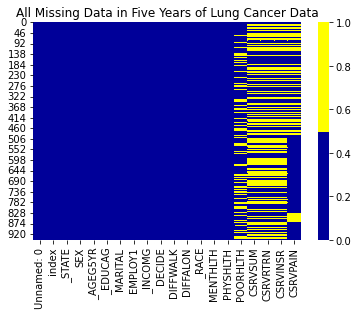

Unnamed: 0 - 0.0%
index - 0.0%
_STATE - 0.0%
SEX - 0.0%
_AGEG5YR - 0.0%
_EDUCAG - 0.0%
MARITAL - 0.0%
EMPLOY1 - 0.0%
_INCOMG - 0.0%
DECIDE - 0.0%
DIFFWALK - 0.0%
DIFFALON - 0.0%
_RACE - 0.0%
MENTHLTH - 0.0%
PHYSHLTH - 0.0%
POORHLTH - 26.984%
CSRVSUM - 47.302%
CSRVRTRN - 47.302%
CSRVINSR - 47.302%
CSRVPAIN - 26.243%


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import plotnine
from plotnine import *
# plt.style.use('ggplot')

# %matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4)

pd.options.mode.chained_assignment = None
# # read in all data
data = pd.read_csv("FiveYrLungCancer.csv")
FiveYrLungCancer = data
print(FiveYrLungCancer.shape)
cols = FiveYrLungCancer.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(FiveYrLungCancer[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('All Missing Data in Five Years of Lung Cancer Data')
plt.show()
for col in FiveYrLungCancer.columns:
    pct_missing = np.mean(FiveYrLungCancer[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

Since the missing data varied depending on which response variable was to be modeled, it was decided to leave this dataframe intact.  
The applicable missing data would be removed during the modeling process. 

Essentially all of the variables that we planned to use as Predictor variables were complete.  

For 3 of the variables that we planned to use as Response variables, the missing data is shown below.

(458, 20)


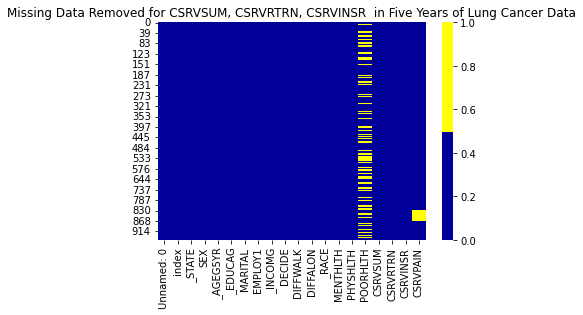

Unnamed: 0 - 0.0%
index - 0.0%
_STATE - 0.0%
SEX - 0.0%
_AGEG5YR - 0.0%
_EDUCAG - 0.0%
MARITAL - 0.0%
EMPLOY1 - 0.0%
_INCOMG - 0.0%
DECIDE - 0.0%
DIFFWALK - 0.0%
DIFFALON - 0.0%
_RACE - 0.0%
MENTHLTH - 0.0%
PHYSHLTH - 0.0%
POORHLTH - 31.441%
CSRVSUM - 0.0%
CSRVRTRN - 0.0%
CSRVINSR - 0.0%
CSRVPAIN - 5.022%


In [16]:
data = FiveYrLungCancer.loc[(~FiveYrLungCancer['CSRVSUM'].isnull())]
lungCancer_Ok_csrvsum = data[(data['CSRVSUM']<3) & (data['CSRVRTRN']<3) & (data['CSRVINSR']<3)]
print(lungCancer_Ok_csrvsum.shape)

cols = lungCancer_Ok_csrvsum.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(lungCancer_Ok_csrvsum[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Missing Data Removed for CSRVSUM, CSRVRTRN, CSRVINSR  in Five Years of Lung Cancer Data')
plt.show()
for col in lungCancer_Ok_csrvsum.columns:
    pct_missing = np.mean(lungCancer_Ok_csrvsum[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

For the other Response variable, the missing data is shown below.

(689, 20)


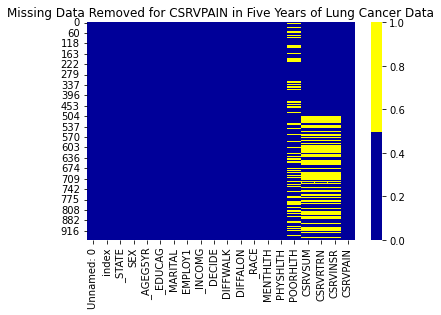

Unnamed: 0 - 0.0%
index - 0.0%
_STATE - 0.0%
SEX - 0.0%
_AGEG5YR - 0.0%
_EDUCAG - 0.0%
MARITAL - 0.0%
EMPLOY1 - 0.0%
_INCOMG - 0.0%
DECIDE - 0.0%
DIFFWALK - 0.0%
DIFFALON - 0.0%
_RACE - 0.0%
MENTHLTH - 0.0%
PHYSHLTH - 0.0%
POORHLTH - 29.608%
CSRVSUM - 32.366%
CSRVRTRN - 32.366%
CSRVINSR - 32.366%
CSRVPAIN - 0.0%


In [17]:
data = FiveYrLungCancer.loc[(~FiveYrLungCancer['CSRVPAIN'].isnull())]
lungCancer_Ok_csrvpain = data[(data['CSRVPAIN']<3)]
print(lungCancer_Ok_csrvpain.shape)
cols = lungCancer_Ok_csrvpain.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(lungCancer_Ok_csrvpain[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Missing Data Removed for CSRVPAIN in Five Years of Lung Cancer Data')
plt.show()
for col in lungCancer_Ok_csrvpain.columns:
    pct_missing = np.mean(lungCancer_Ok_csrvpain[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

### Data Exploration

In [18]:
import copy
lungCancer = copy.deepcopy(FiveYrLungCancer)

In [19]:
lungCancer_state = lungCancer._STATE.drop_duplicates()
lungCancer_state = list(lungCancer_state)

In [20]:
cdc_state = {1: 'Alabama', 
             2: 'Alaska', 
             4: 'Arizona',
             5: 'Arkansas',
             6: 'California',
             8: 'Colorado',
             9: 'Connecticut',
             10: 'Delaware',
             11: 'District of Columbia',
             12: 'Florida',
             13: 'Georgia',
             15: 'Hawaii',
             16: 'Idaho',
             17: 'Illinois',
             18: 'Indiana',
             19: 'Iowa',
             20: 'Kansas',
             21: 'Kentucky',
             22: 'Louisiana',
             23: 'Maine',
             24: 'Maryland',
             25: 'Massachusetts',
             26: 'Michigan',
             27: 'Minnesota',
             28: 'Mississippi',
             29: 'Missouri',
             30: 'Montana',
             31: 'Nebraska',
             32: 'Nevada',
             33: 'New Hampshire',
             34: 'New Jersey',
             35: 'New Mexico',
             36: 'New York',
             37: 'North Carolina',
             38: 'North Dakota',
             39: 'Ohio',
             40: 'Oklahoma',
             41: 'Oregon',
             42: 'Pennsylvania',
             44: 'Rhode Island',
             45: 'South Carolina',
             46: 'South Dakota',
             47: 'Tennessee',
             48: 'Texas',
             49: 'Utah',
             50: 'Vermont',
             51: 'Virginia',
             53: 'Washington',
             54: 'West Virginia',
             55: 'Wisconsin',
             56: 'Wyoming',
             66: 'Guam',
             72: 'Puerto Rico'}

In [21]:
cdc_abb = {
    'Alabama': 'AL', 
    'Alaska': 'AK', 
    'Arizona': 'AZ', 
    'Arkansas': 'AR', 
    'California': 'CA', 
    'Colorado': 'CO', 
    'Connecticut': 'CT', 
    'Delaware': 'DE', 
    'District of Columbia': 'DC', 
    'Florida': 'FL', 
    'Georgia': 'GA', 
    'Hawaii': 'HI', 
    'Idaho': 'ID', 
    'Illinois': 'IL', 
    'Indiana': 'IN', 
    'Iowa': 'IA', 
    'Kansas': 'KS', 
    'Kentucky': 'KY', 
    'Louisiana': 'LA', 
    'Maine': 'ME', 
    'Maryland': 'MD', 
    'Massachusetts': 'MA', 
    'Michigan': 'MI', 
    'Minnesota': 'MN', 
    'Mississippi': 'MS', 
    'Missouri': 'MO', 
    'Montana': 'MT', 
    'Nebraska': 'NE', 
    'Nevada': 'NV', 
    'New Hampshire': 'NH', 
    'New Jersey': 'NJ', 
    'New Mexico': 'NM', 
    'New York': 'NY', 
    'North Carolina': 'NC', 
    'North Dakota': 'ND', 
    'Ohio': 'OH', 
    'Oklahoma': 'OK', 
    'Oregon': 'OR', 
    'Pennsylvania': 'PA', 
    'Rhode Island': 'RI', 
    'South Carolina': 'SC', 
    'South Dakota': 'SD', 
    'Tennessee': 'TN', 
    'Texas': 'TX', 
    'Utah': 'UT', 
    'Vermont': 'VT', 
    'Virginia': 'VA', 
    'Washington': 'WA', 
    'West Virginia': 'WV', 
    'Wisconsin': 'WI', 
    'Wyoming': 'WY', 
    'Guam': 'GU', 
    'Puerto Rico': 'PR'
}

In [22]:
LCS_state_counts = lungCancer['_STATE'].value_counts().rename_axis('States Abbreviation').reset_index(name='Lung Cancer Interviewee Count')

In [23]:
LCS_state_counts['States Abbreviation'] =  [cdc_abb[cdc_state[item]] for item in LCS_state_counts['States Abbreviation']]

In [24]:
LCS_state_counts.to_csv('LCS_state_counts.csv', index=False)
state_df = pd.read_csv('LCS_state_counts.csv')

In [25]:
fig = px.choropleth(state_df,  # Input Pandas DataFrame
                    locations=state_df['States Abbreviation'],  # DataFrame column with locations
                    color=state_df['Lung Cancer Interviewee Count'],  # DataFrame column with color values
                    hover_name='States Abbreviation', # DataFrame column hover info
                    locationmode = 'USA-states', scope = 'usa') # Set to plot as US States

fig.show()

In [26]:
# Converting 1s and 2s into Male and Female
lungCancer.loc[lungCancer['SEX'] == 1, 'SEX'] = 'Male'
lungCancer.loc[lungCancer['SEX'] == 2, 'SEX'] = 'Female'

In [27]:
# Converting nums into race
lungCancer.loc[lungCancer['_RACE'] == 1, '_RACE'] = 'White only, non-Hispanic'
lungCancer.loc[lungCancer['_RACE'] == 2, '_RACE'] = 'Black only, non-Hispanic'
lungCancer.loc[lungCancer['_RACE'] == 3, '_RACE'] = 'American Indian or Alaskan Native only, Non-Hispanic'
lungCancer.loc[lungCancer['_RACE'] == 4, '_RACE'] = 'Asian only, non-Hispanic'
lungCancer.loc[lungCancer['_RACE'] == 5, '_RACE'] = 'Native Hawaiian or other Pacific Islander only, Non-Hispanic'
lungCancer.loc[lungCancer['_RACE'] == 6, '_RACE'] = 'Other race only, non-Hispanic'
lungCancer.loc[lungCancer['_RACE'] == 7, '_RACE'] = 'Multiracial, non-Hispanic'
lungCancer.loc[lungCancer['_RACE'] == 8, '_RACE'] = 'Hispanic'
lungCancer.loc[lungCancer['_RACE'] == 9, '_RACE'] = 'Unknown'

In [28]:
# Converting age nums into age bins
lungCancer.loc[lungCancer['_AGEG5YR'] == 1, '_AGEG5YR'] = 'Age 18 to 24'
lungCancer.loc[lungCancer['_AGEG5YR'] == 2, '_AGEG5YR'] = 'Age 25 to 29'
lungCancer.loc[lungCancer['_AGEG5YR'] == 3, '_AGEG5YR'] = 'Age 30 to 34'
lungCancer.loc[lungCancer['_AGEG5YR'] == 4, '_AGEG5YR'] = 'Age 35 to 39'
lungCancer.loc[lungCancer['_AGEG5YR'] == 5, '_AGEG5YR'] = 'Age 40 to 44'
lungCancer.loc[lungCancer['_AGEG5YR'] == 6, '_AGEG5YR'] = 'Age 45 to 49'
lungCancer.loc[lungCancer['_AGEG5YR'] == 7, '_AGEG5YR'] = 'Age 50 to 54'
lungCancer.loc[lungCancer['_AGEG5YR'] == 8, '_AGEG5YR'] = 'Age 55 to 59'
lungCancer.loc[lungCancer['_AGEG5YR'] == 9, '_AGEG5YR'] = 'Age 60 to 64'
lungCancer.loc[lungCancer['_AGEG5YR'] == 10, '_AGEG5YR'] = 'Age 65 to 69'
lungCancer.loc[lungCancer['_AGEG5YR'] == 11, '_AGEG5YR'] = 'Age 70 to 74'
lungCancer.loc[lungCancer['_AGEG5YR'] == 12, '_AGEG5YR'] = 'Age 75 to 79'
lungCancer.loc[lungCancer['_AGEG5YR'] == 13, '_AGEG5YR'] = 'Age 80 or older'
lungCancer.loc[lungCancer['_AGEG5YR'] == 14, '_AGEG5YR'] = 'Don’t know/Refused/Missing'

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



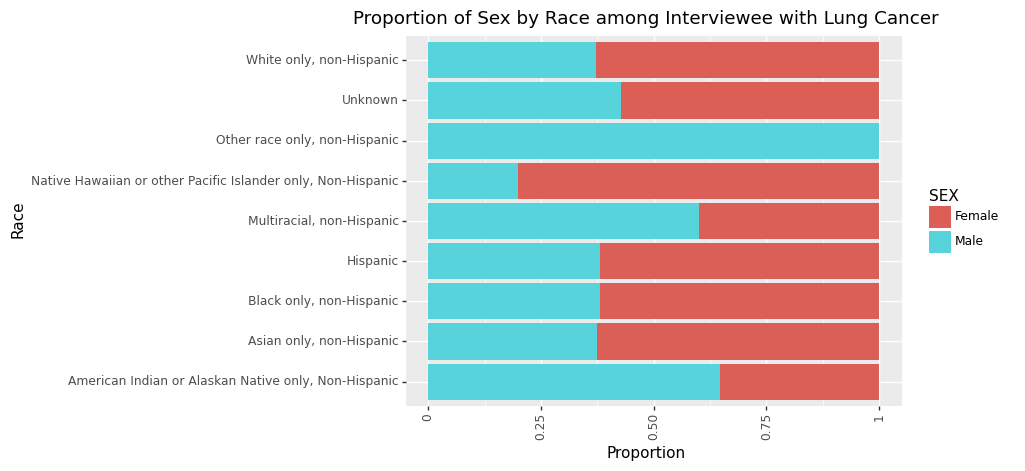

<ggplot: (8791232734637)>

In [29]:
# Code for proportion between race and sex
(ggplot(lungCancer, aes('_RACE', fill='SEX'))
 + geom_bar(position='fill') + labs(x='Race', y='Proportion', title='Proportion of Sex by Race among Interviewee with Lung Cancer') 
 + coord_flip()
 + theme(axis_text_x = element_text(angle = 90, vjust = 1.0, hjust=0.5))
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning:

'stat_bin()' using 'bins = 30'. Pick better value with 'binwidth'.



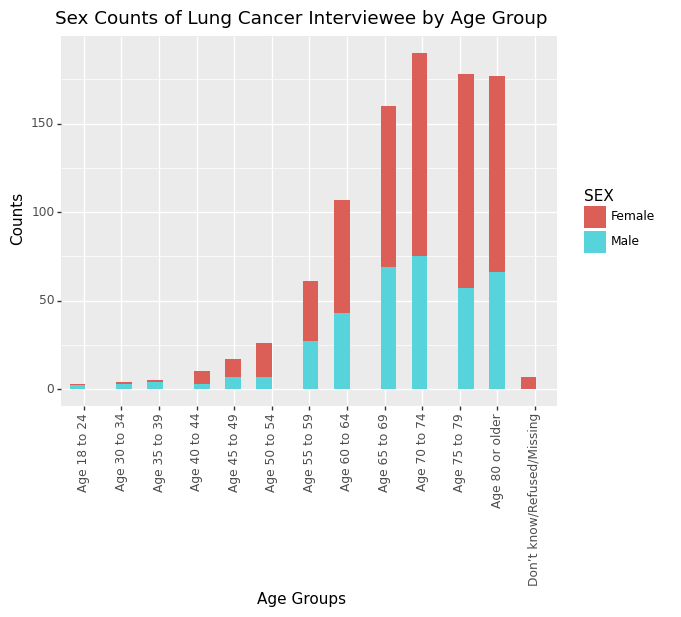

<ggplot: (8791221927733)>

In [30]:
# Code for IQR
(
    ggplot(lungCancer, aes('_AGEG5YR', fill = 'SEX')) + geom_histogram() 
    + labs(x='Age Groups', y='Counts', title='Sex Counts of Lung Cancer Interviewee by Age Group')
    + theme(axis_text_x = element_text(angle = 90, vjust = 1.0, hjust=0.5))
)

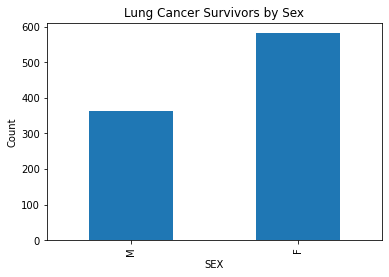

In [31]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['SEX']).count().plot.bar()
plt.title('Lung Cancer Survivors by Sex')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(2),labels=('M','F'))

plt.show()

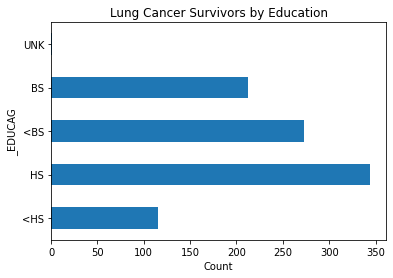

In [32]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['_EDUCAG']).count().plot.barh()
plt.title('Lung Cancer Survivors by Education')
plt.xlabel('Count')
plt.yticks(ticks=np.arange(5),labels=('<HS','HS','<BS','BS','UNK'))
plt.show()

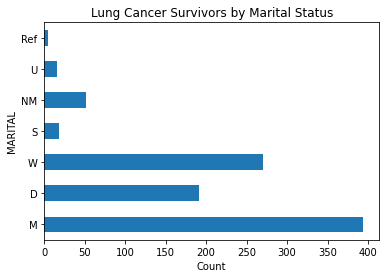

In [33]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['MARITAL']).count().plot.barh()
plt.title('Lung Cancer Survivors by Marital Status')
plt.xlabel('Count')
plt.yticks(ticks=np.arange(7),labels=('M','D','W','S','NM','U','Ref'))
plt.show()

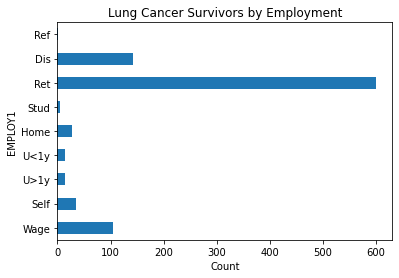

In [34]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['EMPLOY1']).count().plot.barh()
plt.title('Lung Cancer Survivors by Employment')
plt.xlabel('Count')
plt.yticks(ticks=np.arange(9),labels=('Wage','Self','U>1y','U<1y','Home','Stud','Ret','Dis','Ref'))
plt.show()

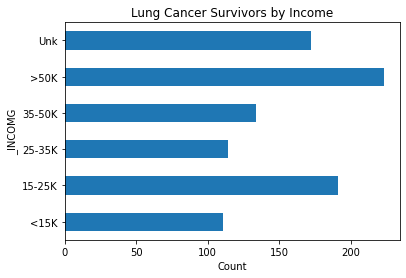

In [35]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['_INCOMG']).count().plot.barh()
plt.title('Lung Cancer Survivors by Income')
plt.xlabel('Count')
plt.yticks(ticks=np.arange(6),labels=('<15K','15-25K','25-35K','35-50K','>50K','Unk'))
plt.show()

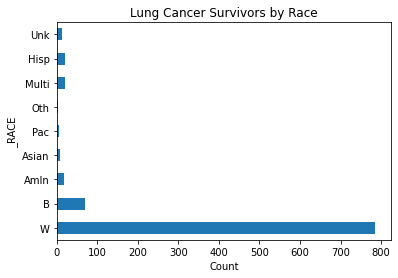

In [36]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['_RACE']).count().plot.barh()
plt.title('Lung Cancer Survivors by Race')
plt.xlabel('Count')
plt.yticks(ticks=np.arange(9),labels=('W','B','AmIn','Asian','Pac','Oth','Multi','Hisp','Unk'))
plt.show()

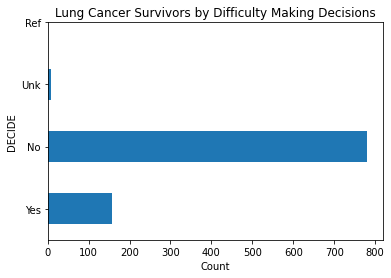

In [37]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['DECIDE']).count().plot.barh()
plt.title('Lung Cancer Survivors by Difficulty Making Decisions')
plt.xlabel('Count')
plt.yticks(ticks=np.arange(4),labels=('Yes','No','Unk','Ref'))
plt.show()

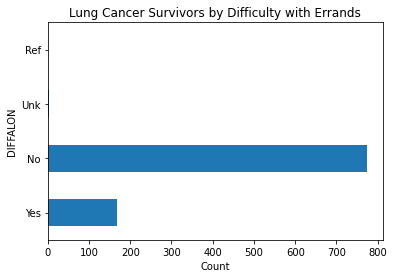

In [38]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['DIFFALON']).count().plot.barh()
plt.title('Lung Cancer Survivors by Difficulty with Errands')
plt.xlabel('Count')
plt.yticks(ticks=np.arange(4),labels=('Yes','No','Unk','Ref'))
plt.show()

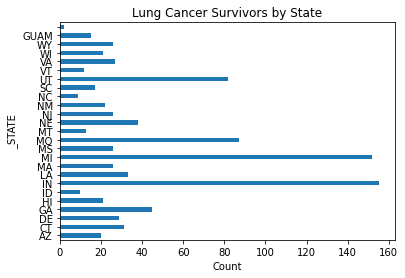

In [39]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['_STATE']).count().plot.barh()
plt.title('Lung Cancer Survivors by State')
plt.xlabel('Count')
plt.yticks(ticks=np.arange(25),labels=('AZ','CT','DE','GA','HI','ID','IN','LA','MA','MI','MS','MO','MT','NE','NJ','NM','NC','SC','UT','VT','VA','WI','WY','GUAM'))
plt.show()

In [40]:
# Converting CSRVSUM numeric values to CDC labels
lungCancer.loc[lungCancer['CSRVSUM'] == 1, 'CSRVSUM'] = 'Yes'
lungCancer.loc[lungCancer['CSRVSUM'] == 2, 'CSRVSUM'] = 'No'
lungCancer.loc[lungCancer['CSRVSUM'] == 7, 'CSRVSUM'] = 'Don’t know/Not Sure '
lungCancer.loc[lungCancer['CSRVSUM'] == 9, 'CSRVSUM'] = 'Refused'
lungCancer['CSRVSUM'] = lungCancer['CSRVSUM'].fillna('Not asked or Missing')

In [41]:
# Converting CSRVRTRN numeric values to CDC labels
lungCancer.loc[lungCancer['CSRVRTRN'] == 1, 'CSRVRTRN'] = 'Yes'
lungCancer.loc[lungCancer['CSRVRTRN'] == 2, 'CSRVRTRN'] = 'No'
lungCancer.loc[lungCancer['CSRVRTRN'] == 7, 'CSRVRTRN'] = 'Don’t know/Not Sure '
lungCancer.loc[lungCancer['CSRVRTRN'] == 9, 'CSRVRTRN'] = 'Refused'
lungCancer['CSRVRTRN'] = lungCancer['CSRVRTRN'].fillna('Not asked or Missing')

In [42]:
# Converting CSRVINSR numeric values to CDC labels
lungCancer.loc[lungCancer['CSRVINSR'] == 1, 'CSRVINSR'] = 'Yes'
lungCancer.loc[lungCancer['CSRVINSR'] == 2, 'CSRVINSR'] = 'No'
lungCancer.loc[lungCancer['CSRVINSR'] == 7, 'CSRVINSR'] = 'Don’t know/Not Sure '
lungCancer.loc[lungCancer['CSRVINSR'] == 9, 'CSRVINSR'] = 'Refused'
lungCancer['CSRVINSR'] = lungCancer['CSRVINSR'].fillna('Not asked or Missing')

In [43]:
# Converting CSRVPAIN numeric values to CDC labels
lungCancer.loc[lungCancer['CSRVPAIN'] == 1, 'CSRVPAIN'] = 'Yes'
lungCancer.loc[lungCancer['CSRVPAIN'] == 2, 'CSRVPAIN'] = 'No'
lungCancer.loc[lungCancer['CSRVPAIN'] == 7, 'CSRVPAIN'] = 'Don’t know/Not Sure '
lungCancer.loc[lungCancer['CSRVPAIN'] == 9, 'CSRVPAIN'] = 'Refused'
lungCancer['CSRVPAIN'] = lungCancer['CSRVPAIN'].fillna('Not asked or Missing')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning:

'stat_bin()' using 'bins = 15'. Pick better value with 'binwidth'.



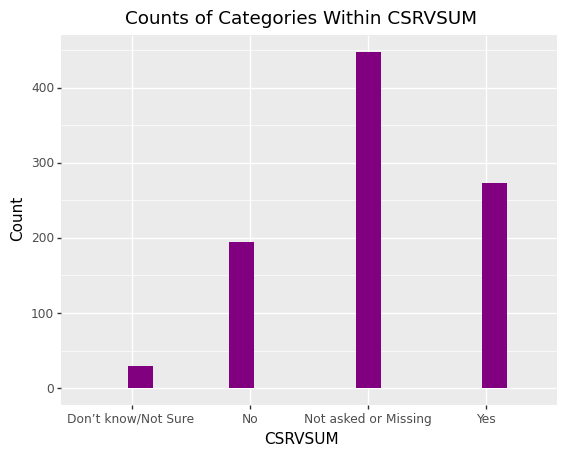

<ggplot: (8791220339237)>

In [44]:
(
    ggplot(lungCancer, aes('CSRVSUM')) + geom_histogram(fill='purple')
    + labs(x='CSRVSUM', y='Count', title='Counts of Categories Within CSRVSUM')
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning:

'stat_bin()' using 'bins = 10'. Pick better value with 'binwidth'.



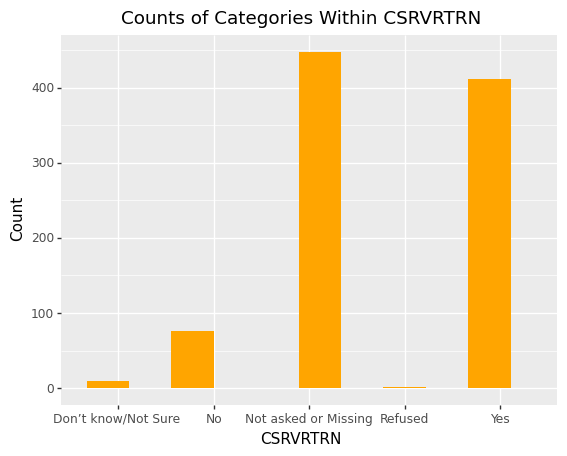

<ggplot: (8791248285125)>

In [45]:
(
    ggplot(lungCancer, aes('CSRVRTRN')) + geom_histogram(fill='orange')
    + labs(x='CSRVRTRN', y='Count', title='Counts of Categories Within CSRVRTRN')
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning:

'stat_bin()' using 'bins = 10'. Pick better value with 'binwidth'.



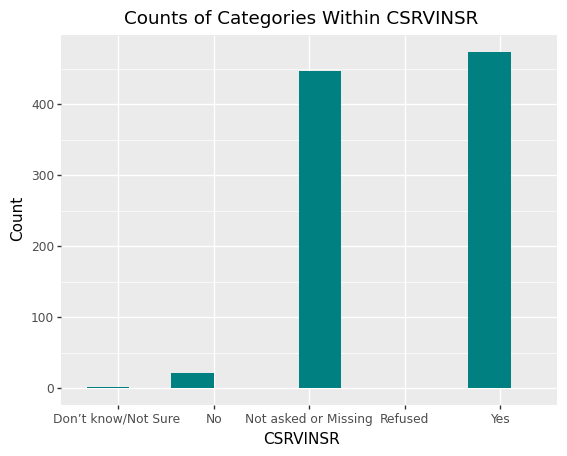

<ggplot: (8791222082853)>

In [46]:
(
    ggplot(lungCancer, aes('CSRVINSR')) + geom_histogram(fill='teal')
    + labs(x='CSRVINSR', y='Count', title='Counts of Categories Within CSRVINSR')
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning:

'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.



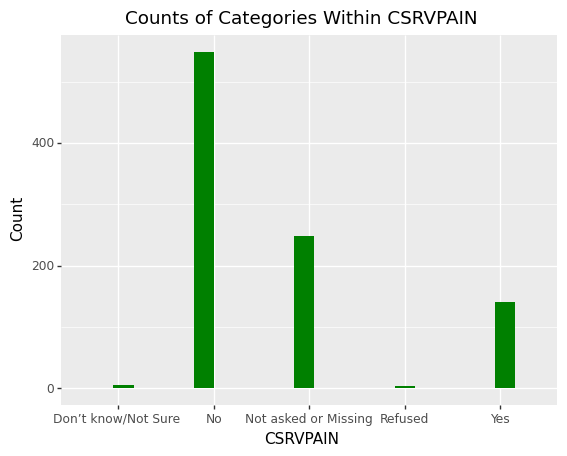

<ggplot: (8791218708161)>

In [47]:
(
    ggplot(lungCancer, aes('CSRVPAIN')) + geom_histogram(fill='green')
    + labs(x='CSRVPAIN', y='Count', title='Counts of Categories Within CSRVPAIN')
)

### Modeling with R 

In [48]:
%load_ext rpy2.ipython

#### Logistic Regression for Predictor _EDUCAG & Response Variable CSRVSUM

In [49]:
data = copy.deepcopy(FiveYrLungCancer)
# remove unwanted levels
data = data[(data['CSRVSUM']<3) & (data['CSRVRTRN']<3) & (data['CSRVINSR']<3)]
data = data[(data['_EDUCAG']<5)]

data01 = copy.deepcopy(data)
data01.to_csv('data01.csv')

In [50]:
%%R
Data <- read.csv('data01.csv')

Data[,5]<-factor(Data[,5])
Data[,6]<-factor(Data[,6])
Data[,7]<-factor(Data[,7])
Data[,8]<-factor(Data[,8])
Data[,9]<-factor(Data[,9])
Data[,10]<-factor(Data[,10])
Data[,11]<-factor(Data[,11])
Data[,12]<-factor(Data[,12])
Data[,13]<-factor(Data[,13])
Data[,14]<-factor(Data[,14])

Data[,18]<-factor(Data[,18])
Data[,19]<-factor(Data[,19])
Data[,20]<-factor(Data[,20])
Data[,21]<-factor(Data[,21])

Data[,5]<-relevel(Data[,5], ref="1")
Data[,6]<-relevel(Data[,6], ref="1")
Data[,7]<-relevel(Data[,7], ref="1")
Data[,8]<-relevel(Data[,8], ref="1")
Data[,9]<-relevel(Data[,9], ref="1")
Data[,10]<-relevel(Data[,10], ref="1")
Data[,11]<-relevel(Data[,11], ref="1")
Data[,12]<-relevel(Data[,12], ref="1")
Data[,13]<-relevel(Data[,13], ref="1")
Data[,14]<-relevel(Data[,14], ref="1")

Data[,18]<-relevel(Data[,18], ref="1")
Data[,19]<-relevel(Data[,19], ref="1")
Data[,20]<-relevel(Data[,20], ref="1")
Data[,21]<-relevel(Data[,21], ref="1")


In [51]:
%%R
set.seed(1)
sample<-sample.int(nrow(Data), floor(.80*nrow(Data)), replace = F)
train<-Data[sample, ]
test<-Data[-sample, ]

# ##full model
result<-glm(CSRVSUM ~ X_EDUCAG, family = "binomial", data=train)
summary(result)


Call:
glm(formula = CSRVSUM ~ X_EDUCAG, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2907  -0.9609  -0.8628   1.1909   1.5288  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   0.2624     0.2974   0.882  0.37771   
X_EDUCAG2    -0.2941     0.3467  -0.848  0.39629   
X_EDUCAG3    -0.7957     0.3529  -2.255  0.02415 * 
X_EDUCAG4    -1.0587     0.3893  -2.720  0.00654 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 497.68  on 364  degrees of freedom
Residual deviance: 486.15  on 361  degrees of freedom
AIC: 494.15

Number of Fisher Scoring iterations: 4



In [52]:
%%R
TS<-result$null.deviance-result$deviance
print(paste("p-value = ", 1-pchisq(TS,4)))

[1] "p-value =  0.0212117864944179"


In [53]:
%%R
#use model to predict value of CSRVSUM
preds<-predict(result, newdata=test, type="response")

In [54]:
%%R
rates<-data.frame(test$CSRVSUM)
rates2<-cbind(rates,preds)

In [55]:
%%R
table(rates2$test.CSRVSUM,preds>0.45)

   
    FALSE TRUE
  1    33   24
  2    14   21


In [56]:
%%R
TP <- 21
TN <- 33
FP <- 24
FN <- 14
Accuracy <- (TP + TN) / (TP+TN+FP+FN)
print(paste("Accuracy", Accuracy))

[1] "Accuracy 0.58695652173913"


#### Logistic Regression for Predictor _INCOMG & Response Variable of CSRVSUM

In [57]:
data = copy.deepcopy(FiveYrLungCancer)
# remove unwanted predictor levels for _EDUCAG
data = data[(data['CSRVSUM']<3) & (data['CSRVRTRN']<3) & (data['CSRVINSR']<3)]
data = data[(data['_INCOMG']<9)]
data01 = copy.deepcopy(data)
data01.to_csv('data01.csv')

In [58]:
%%R
Data <- read.csv('data01.csv')

Data[,5]<-factor(Data[,5])
Data[,6]<-factor(Data[,6])
Data[,7]<-factor(Data[,7])
Data[,8]<-factor(Data[,8])
Data[,9]<-factor(Data[,9])
Data[,10]<-factor(Data[,10])
Data[,11]<-factor(Data[,11])
Data[,12]<-factor(Data[,12])
Data[,13]<-factor(Data[,13])
Data[,14]<-factor(Data[,14])

Data[,18]<-factor(Data[,18])
Data[,19]<-factor(Data[,19])
Data[,20]<-factor(Data[,20])
Data[,21]<-factor(Data[,21])

Data[,5]<-relevel(Data[,5], ref="1")
Data[,6]<-relevel(Data[,6], ref="1")
Data[,7]<-relevel(Data[,7], ref="1")
Data[,8]<-relevel(Data[,8], ref="1")
Data[,9]<-relevel(Data[,9], ref="1")
Data[,10]<-relevel(Data[,10], ref="1")
Data[,11]<-relevel(Data[,11], ref="1")
Data[,12]<-relevel(Data[,12], ref="1")
Data[,13]<-relevel(Data[,13], ref="1")
Data[,14]<-relevel(Data[,14], ref="1")

Data[,18]<-relevel(Data[,18], ref="1")
Data[,19]<-relevel(Data[,19], ref="1")
Data[,20]<-relevel(Data[,20], ref="1")
Data[,21]<-relevel(Data[,21], ref="1")


In [59]:
%%R
set.seed(1)
sample<-sample.int(nrow(Data), floor(.80*nrow(Data)), replace = F)
train<-Data[sample, ]
test<-Data[-sample, ]

# ##full model
result<-glm(CSRVSUM ~ X_INCOMG, family = "binomial", data=train)
summary(result)


Call:
glm(formula = CSRVSUM ~ X_INCOMG, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2033  -1.0365  -0.8607   1.3252   1.5315  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  0.06062    0.34832   0.174   0.8618  
X_INCOMG2   -0.40155    0.41809  -0.960   0.3368  
X_INCOMG3   -0.62702    0.44268  -1.416   0.1567  
X_INCOMG4   -0.24295    0.44120  -0.551   0.5819  
X_INCOMG5   -0.86297    0.42075  -2.051   0.0403 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 411.73  on 306  degrees of freedom
Residual deviance: 405.93  on 302  degrees of freedom
AIC: 415.93

Number of Fisher Scoring iterations: 4



In [60]:
%%R
TS<-result$null.deviance-result$deviance
print(paste("p-value = ", 1-pchisq(TS,3)))

[1] "p-value =  0.121789798652368"


In [61]:
%%R
#use model to predict value of CSRVSUM
preds<-predict(result, newdata=test, type="response")

In [62]:
%%R
rates<-data.frame(test$CSRVSUM)
rates2<-cbind(rates,preds)

In [63]:
%%R
table(rates2$test.CSRVSUM,preds>0.4)

   
    FALSE TRUE
  1    22   19
  2    14   22


In [64]:
%%R
TP <- 22
TN <- 22
FP <- 19
FN <- 14
Accuracy <- (TP + TN) / (TP+TN+FP+FN)
print(paste("Accuracy", Accuracy))

[1] "Accuracy 0.571428571428571"
